In [355]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect('../Data/im.db')

In [356]:
df_1=pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
df_2=pd.read_csv('../zippedData/rt.movie_info.tsv.gz', sep='\t')
df_3=pd.read_csv('../zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
df_4=pd.read_csv('../zippedData/tmdb.movies.csv.gz')
df_5=pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')


In [357]:
conn=sqlite3.connect('../Data/im.db')

### BOM Data Set

In [358]:
df_1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [359]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [360]:
df_1.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [361]:
df_1['foreign_gross']=df_1['foreign_gross'].str.replace(',','').astype('float64')

In [362]:
df_1.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [363]:
df_1.duplicated().sum()

0

In [364]:
df_1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [365]:
missing_percent=df_1.isna().sum()/len(df_1)*100
missing_percent

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [366]:
df_1=df_1.dropna(subset=['studio','domestic_gross'])

In [367]:
bom_mean=df_1['foreign_gross'].mean()
bom_mean

75790384.84130543

In [368]:
bom_median=df_1['foreign_gross'].median()
bom_median

19400000.0

In [369]:
df_1['foreign_gross']=df_1['foreign_gross'].fillna(df_1['foreign_gross'].median())

In [370]:
df_1.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### RT movie Data set

In [371]:
df_2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [372]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [373]:
df_2.duplicated().sum()

0

In [374]:
df_2.isna().sum()  

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [375]:
missing_percentage_2=df_2.isna().sum()/len(df_2)*100
missing_percentage_2

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

### RT Reviews Data Set

In [376]:
df_3.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [377]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [378]:
df_3.duplicated().sum()

9

In [379]:
df_3=df_3.drop_duplicates()

In [380]:
df_3.duplicated().sum()

0

In [381]:
missing_percentage_3=df_3.isna().sum()/len(df_3)*100
missing_percentage_3    

id             0.000000
review        10.208919
rating        24.835088
fresh          0.000000
critic         4.985025
top_critic     0.000000
publisher      0.567775
date           0.000000
dtype: float64

### TMDB Data Set

In [382]:
df_4.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [383]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [384]:
df_4.duplicated().sum()

0

In [385]:
missing_percentage_4=df_4.isna().sum()/len(df_4)*100
missing_percentage_4

Unnamed: 0           0.0
genre_ids            0.0
id                   0.0
original_language    0.0
original_title       0.0
popularity           0.0
release_date         0.0
title                0.0
vote_average         0.0
vote_count           0.0
dtype: float64

### TN Data Set

In [386]:
df_5.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [387]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [388]:
df_5['production_budget'] = df_5['production_budget'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df_5['domestic_gross'] = df_5['domestic_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df_5['worldwide_gross'] = df_5['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)


In [389]:
df_5.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [390]:
df_5.duplicated().sum()

0

In [391]:
df_5.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### IMDB Data Set

In [392]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [393]:
pd.read_sql("SELECT * FROM movie_basics LIMIT 5;",conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [394]:
pd.read_sql("SELECT * FROM movie_ratings LIMIT 5;",conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [395]:
pd.read_sql("SELECT * FROM movie_akas LIMIT 5;",conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [396]:
imdb=pd.read_sql("SELECT * FROM movie_basics JOIN movie_ratings ON movie_basics.movie_id=movie_ratings.movie_id;",conn)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


In [397]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   movie_id         73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.1+ MB


In [398]:
missing_percent_5=imdb.isna().sum()/len(imdb)*100
missing_percent_5

movie_id            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
movie_id            0.000000
averagerating       0.000000
numvotes            0.000000
dtype: float64

In [399]:
imdb.dropna(subset=['genres'],inplace=True)

In [400]:
imdb_mean=imdb['runtime_minutes'].mean()
imdb_mean

94.7322732805843

In [401]:
imdb_median=imdb['runtime_minutes'].median()
imdb_median

91.0

In [402]:
imdb['runtime_minutes']=imdb['runtime_minutes'].fillna(imdb_median)


In [403]:
imdb.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
movie_id           0
averagerating      0
numvotes           0
dtype: int64

### Compare production budgets for movies with their total gross. Examine whether there is increase in production budget over the years, and if the gross is keping up with it.

### OBJECTIVE 3

In [404]:
# Using df_5 for this objective
df_5.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [405]:
df_5.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [406]:
#changing the date column into the correct datetime format
df_5['release_date'] = pd.to_datetime(df_5['release_date'], errors='coerce')

#creating a column with year only
df_5['year'] = df_5['release_date'].dt.year


In [407]:
df_5.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


In [408]:
yearly_avg = df_5.groupby('year')[['production_budget', 'worldwide_gross']].mean().reset_index()


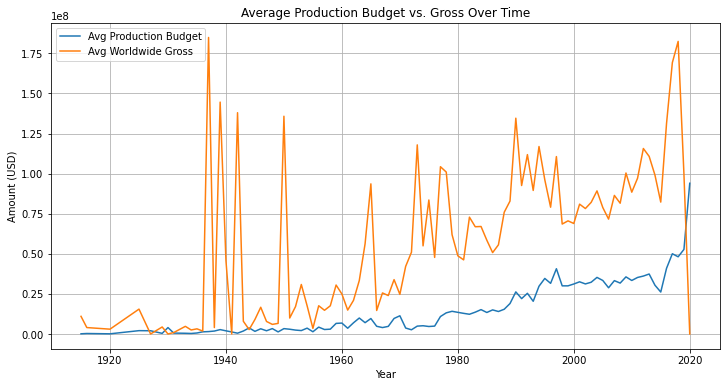

In [409]:

plt.figure(figsize=(12,6))
plt.plot(yearly_avg['year'], yearly_avg['production_budget'], label='Avg Production Budget')
plt.plot(yearly_avg['year'], yearly_avg['worldwide_gross'], label='Avg Worldwide Gross')
plt.xlabel('Year')
plt.ylabel('Amount (USD)')
plt.title('Average Production Budget vs. Gross Over Time')
plt.legend()
plt.grid(True)
plt.show()


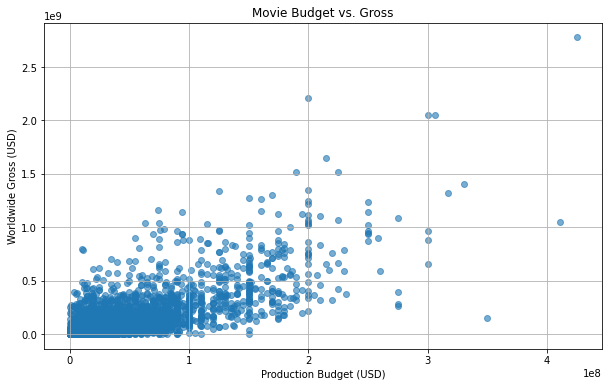

In [410]:


plt.figure(figsize=(10,6))
plt.scatter(df_5['production_budget'], df_5['worldwide_gross'], alpha=0.6)
plt.xlabel('Production Budget (USD)')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Movie Budget vs. Gross')
plt.grid(True)
plt.show()


In [411]:
df_5['production_budget'].corr(df_5['worldwide_gross'])


0.7483059765694758

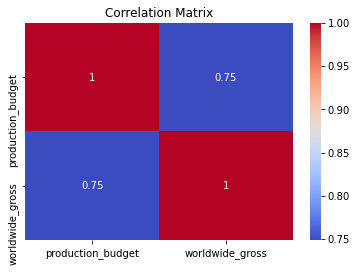

In [412]:

corr = df_5[['production_budget', 'worldwide_gross']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### OBJECTIVE 5

In [413]:
querry="""SELECT 
                    d.person_id,
                    p.primary_name,
                    p.primary_profession,
                    d.movie_id,
                    m.original_title,
                    m.genres,
                    mo.averagerating,
                    moa.language
            FROM directors d
            INNER JOIN persons p ON d.person_id = p.person_id
            INNER JOIN movie_basics m ON d.movie_id = m.movie_id
            INNER JOIN movie_ratings mo ON d.movie_id = mo.movie_id
            INNER JOIN movie_akas moa ON d.movie_id = moa.movie_id;
            """

imdb_joint=pd.read_sql(querry,conn)
imdb_joint.head(10)

,person_id,primary_name,primary_profession,movie_id,original_title,genres,averagerating,language
0,nm0899854,Tony Vitale,"producer,director,writer",tt0285252,Life's a Beach,Comedy,3.9,None
1,nm0899854,Tony Vitale,"producer,director,writer",tt0285252,Life's a Beach,Comedy,3.9,None
2,nm0899854,Tony Vitale,"producer,director,writer",tt0285252,Life's a Beach,Comedy,3.9,None
3,nm0899854,Tony Vitale,"producer,director,writer",tt0285252,Life's a Beach,Comedy,3.9,None
4,nm0899854,Tony Vitale,"producer,director,writer",tt0285252,Life's a Beach,Comedy,3.9,None
5,nm0899854,Tony Vitale,"producer,director,writer",tt0285252,Life's a Beach,Comedy,3.9,None
6,nm0899854,Tony Vitale,"producer,director,writer",tt0285252,Life's a Beach,Comedy,3.9,en
7,nm1940585,Bill Haley,"director,writer,producer",tt0462036,Steve Phoenix: The Untold Story,Drama,5.5,None
8,nm0151540,Jay Chandrasekhar,"director,actor,writer",tt0835418,The Babymakers,Comedy,5.0,None
9,nm0151540,Jay Chandrasekhar,"director,actor,writer",tt0835418,The Babymakers,Comedy,5.0,None


In [414]:
imdb_joint.tail(10)

,person_id,primary_name,primary_profession,movie_id,original_title,genres,averagerating,language
722928,nm0737517,Mike Rohl,"director,assistant_director,producer",tt8954732,The Princess Switch,Romance,6.0,None
722929,nm0737517,Mike Rohl,"director,assistant_director,producer",tt8954732,The Princess Switch,Romance,6.0,None
722930,nm0737517,Mike Rohl,"director,assistant_director,producer",tt8954732,The Princess Switch,Romance,6.0,None
722931,nm0737517,Mike Rohl,"director,assistant_director,producer",tt8954732,The Princess Switch,Romance,6.0,None
722932,nm0737517,Mike Rohl,"director,assistant_director,producer",tt8954732,The Princess Switch,Romance,6.0,None
722933,nm0737517,Mike Rohl,"director,assistant_director,producer",tt8954732,The Princess Switch,Romance,6.0,None
722934,nm0737517,Mike Rohl,"director,assistant_director,producer",tt8954732,The Princess Switch,Romance,6.0,None
722935,nm0737517,Mike Rohl,"director,assistant_director,producer",tt8954732,The Princess Switch,Romance,6.0,None
722936,nm0737517,Mike Rohl,"director,assistant_director,producer",tt8954732,The Princess Switch,Romance,6.0,None
722937,nm0737517,Mike Rohl,"director,assistant_director,producer",tt8954732,The Princess Switch,Romance,6.0,None


In [415]:
imdb_joint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722938 entries, 0 to 722937
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           722938 non-null  object 
 1   primary_name        722938 non-null  object 
 2   primary_profession  722826 non-null  object 
 3   movie_id            722938 non-null  object 
 4   original_title      722938 non-null  object 
 5   genres              720595 non-null  object 
 6   averagerating       722938 non-null  float64
 7   language            100918 non-null  object 
dtypes: float64(1), object(7)
memory usage: 44.1+ MB


In [416]:
imdb_joint.duplicated().sum()

604859

In [417]:
def first_non_null(x):
    x = x.dropna()
    return x.iloc[0] if not x.empty else None


In [418]:
merged_imdb_joint=imdb_joint.groupby(['person_id','primary_name','movie_id']).agg({'averagerating':'mean','primary_profession':'first','original_title':'first','genres':'first','language':first_non_null}).reset_index()

In [419]:
merged_imdb_joint.head(10)

,person_id,primary_name,movie_id,averagerating,primary_profession,original_title,genres,language
0,nm0000080,Orson Welles,tt0069049,6.9,"actor,director,writer",The Other Side of the Wind,Drama,None
1,nm0000095,Woody Allen,tt1182350,6.3,"writer,director,actor",You Will Meet a Tall Dark Stranger,"Comedy,Drama,Romance",bg
2,nm0000095,Woody Allen,tt1605783,7.7,"writer,director,actor",Midnight in Paris,"Comedy,Fantasy,Romance",bg
3,nm0000095,Woody Allen,tt1859650,6.3,"writer,director,actor",To Rome with Love,"Comedy,Music,Romance",bg
4,nm0000095,Woody Allen,tt2334873,7.3,"writer,director,actor",Blue Jasmine,Drama,bg
5,nm0000095,Woody Allen,tt2870756,6.6,"writer,director,actor",Magic in the Moonlight,"Comedy,Romance",bg
6,nm0000095,Woody Allen,tt3715320,6.6,"writer,director,actor",Irrational Man,"Comedy,Drama",fr
7,nm0000095,Woody Allen,tt4513674,6.6,"writer,director,actor",Café Society,"Comedy,Drama,Romance",bg
8,nm0000095,Woody Allen,tt5825380,6.2,"writer,director,actor",Wonder Wheel,Drama,bg
9,nm0000108,Luc Besson,tt0940656,5.5,"writer,producer,director",Arthur 3: la guerre des deux mondes,"Adventure,Animation,Family",en


In [420]:
merged_imdb_joint.tail(10)

,person_id,primary_name,movie_id,averagerating,primary_profession,original_title,genres,language
81195,nm9955962,Christian Vogel,tt8666494,7.7,"director,writer,cinematographer",Egal was kommt,Documentary,en
81196,nm9975746,Jo Vemund Svendsen,tt8707516,9.1,"director,writer,cinematographer",For vi er gutta,Documentary,en
81197,nm9978107,Ben Berkowitz,tt1342120,7.5,"producer,actor,director",Polish Bar,Drama,None
81198,nm9980613,Hubertus Siegert,tt8714504,7.8,director,Children of Utopia,Documentary,None
81199,nm9980615,Zhenyu Sun,tt8714508,7.2,"director,writer,producer",Pure Land,Drama,None
81200,nm9985593,James Simone,tt3398268,7.7,director,Omoide no Mânî,"Animation,Drama,Family",en
81201,nm9986035,Kristine Briede,tt9021508,7.2,"writer,director,producer",Bridges of Time,Documentary,None
81202,nm9987728,Aleksa Stefan Radunovic,tt8656192,8.0,"director,actor,writer",Lijenstina,Drama,None
81203,nm9988436,Amudhavan Karuppiah,tt7738784,9.4,"director,actor",Peranbu,Drama,en
81204,nm9992927,Laura Cazador,tt7331606,8.5,"director,writer",Insumisa,Drama,None


In [421]:
merged_imdb_joint.duplicated().sum()

0

In [422]:
merged_imdb_joint.isna().sum()

person_id                 0
primary_name              0
movie_id                  0
averagerating             0
primary_profession       33
original_title            0
genres                  720
language              57366
dtype: int64

In [423]:
missing_percentage_6=merged_imdb_joint.isna().sum()/len(merged_imdb_joint)*100
missing_percentage_6

person_id              0.000000
primary_name           0.000000
movie_id               0.000000
averagerating          0.000000
primary_profession     0.040638
original_title         0.000000
genres                 0.886645
language              70.643433
dtype: float64

In [424]:
merged_imdb_joint=merged_imdb_joint.dropna(subset=['primary_profession','genres'])

In [425]:
merged_imdb_joint=merged_imdb_joint.drop('language', axis=1)

In [426]:
merged_imdb_joint.isna().sum()

person_id             0
primary_name          0
movie_id              0
averagerating         0
primary_profession    0
original_title        0
genres                0
dtype: int64

In [427]:
merged_imdb_joint.head(10)

,person_id,primary_name,movie_id,averagerating,primary_profession,original_title,genres
0,nm0000080,Orson Welles,tt0069049,6.9,"actor,director,writer",The Other Side of the Wind,Drama
1,nm0000095,Woody Allen,tt1182350,6.3,"writer,director,actor",You Will Meet a Tall Dark Stranger,"Comedy,Drama,Romance"
2,nm0000095,Woody Allen,tt1605783,7.7,"writer,director,actor",Midnight in Paris,"Comedy,Fantasy,Romance"
3,nm0000095,Woody Allen,tt1859650,6.3,"writer,director,actor",To Rome with Love,"Comedy,Music,Romance"
4,nm0000095,Woody Allen,tt2334873,7.3,"writer,director,actor",Blue Jasmine,Drama
5,nm0000095,Woody Allen,tt2870756,6.6,"writer,director,actor",Magic in the Moonlight,"Comedy,Romance"
6,nm0000095,Woody Allen,tt3715320,6.6,"writer,director,actor",Irrational Man,"Comedy,Drama"
7,nm0000095,Woody Allen,tt4513674,6.6,"writer,director,actor",Café Society,"Comedy,Drama,Romance"
8,nm0000095,Woody Allen,tt5825380,6.2,"writer,director,actor",Wonder Wheel,Drama
9,nm0000108,Luc Besson,tt0940656,5.5,"writer,producer,director",Arthur 3: la guerre des deux mondes,"Adventure,Animation,Family"


In [428]:
merged_imdb_joint['primary_profession'] = merged_imdb_joint['primary_profession'].str.split(',')
merged_imdb_joint_exploded = merged_imdb_joint.explode('primary_profession')


In [429]:
merged_imdb_joint_exploded.head(10)

,person_id,primary_name,movie_id,averagerating,primary_profession,original_title,genres
0,nm0000080,Orson Welles,tt0069049,6.9,actor,The Other Side of the Wind,Drama
0,nm0000080,Orson Welles,tt0069049,6.9,director,The Other Side of the Wind,Drama
0,nm0000080,Orson Welles,tt0069049,6.9,writer,The Other Side of the Wind,Drama
1,nm0000095,Woody Allen,tt1182350,6.3,writer,You Will Meet a Tall Dark Stranger,"Comedy,Drama,Romance"
1,nm0000095,Woody Allen,tt1182350,6.3,director,You Will Meet a Tall Dark Stranger,"Comedy,Drama,Romance"
1,nm0000095,Woody Allen,tt1182350,6.3,actor,You Will Meet a Tall Dark Stranger,"Comedy,Drama,Romance"
2,nm0000095,Woody Allen,tt1605783,7.7,writer,Midnight in Paris,"Comedy,Fantasy,Romance"
2,nm0000095,Woody Allen,tt1605783,7.7,director,Midnight in Paris,"Comedy,Fantasy,Romance"
2,nm0000095,Woody Allen,tt1605783,7.7,actor,Midnight in Paris,"Comedy,Fantasy,Romance"
3,nm0000095,Woody Allen,tt1859650,6.3,writer,To Rome with Love,"Comedy,Music,Romance"


In [430]:
merged_imdb_joint_exploded['primary_profession'].unique()

array(['actor', 'director', 'writer', 'producer', 'soundtrack',
       'music_department', 'actress', 'miscellaneous', 'stunts',
       'animation_department', 'editor', 'production_designer',
       'assistant_director', 'cinematographer', 'composer',
       'camera_department', 'editorial_department', 'production_manager',
       'art_department', 'visual_effects', 'sound_department',
       'costume_designer', 'casting_department', 'special_effects',
       'make_up_department', 'art_director', 'transportation_department',
       'casting_director', 'location_management', 'legal',
       'costume_department', 'executive', 'talent_agent', 'set_decorator',
       'manager', 'publicist'], dtype=object)